In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos1.csv')

In [3]:
youtube.head(10)

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,Entertainment,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Film & Animation,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [4]:
def ganti_tanggal_trending(cols):
    year = cols[0:2]
    month = cols[6:8]
    day = cols[3:5]
    cols = '20'+'{}.{}.{}'.format(year,month,day)
    return cols

youtube['trending_date'] = youtube['trending_date'].apply(ganti_tanggal_trending)

In [5]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],utc='none')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [6]:
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']

In [7]:
youtube['delta_like'] = youtube['likes']-youtube['dislikes']

In [8]:
youtube_delta_0 = youtube[(youtube['delta_like'] == 0)]
youtube_delta_0

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like
192,wRGldR_SQAA,2017-11-14 00:00:00+00:00,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09 18:01:04+00:00,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,4 days 05:58:56,0
1435,Kn5UgGQukYQ,2017-11-21 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,402 days 02:45:09,0
1667,Kn5UgGQukYQ,2017-11-22 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,403 days 02:45:09,0
1868,_akwfRuL4os,2017-11-23 00:00:00+00:00,Highlights of the EA predatory behavior announ...,chris lee,22,People & Blogs,2017-11-21 19:29:03+00:00,[none],160012,0,0,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,1 days 04:30:57,0
1914,Kn5UgGQukYQ,2017-11-23 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,404 days 02:45:09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,UwbO_xb1-Xo,2018-04-05 00:00:00+00:00,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,People & Blogs,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",14 days 05:17:56,0
28346,UwbO_xb1-Xo,2018-04-06 00:00:00+00:00,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,People & Blogs,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",15 days 05:17:56,0
28550,9TUBf6l7FBg,2018-04-14 00:00:00+00:00,Coachella 2018 LIVE Channel 1,Coachella,10,Music,2018-04-05 06:48:28+00:00,[none],3598220,0,0,0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,8 days 17:11:32,0
28751,9TUBf6l7FBg,2018-04-15 00:00:00+00:00,Coachella 2018 LIVE Channel 1,Coachella,10,Music,2018-04-05 06:48:28+00:00,[none],11137071,0,0,2,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,9 days 17:11:32,0


In [9]:
from scipy.stats import shapiro,normaltest,anderson

def trynormal(data):
    result={'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}, 'Shapiro': shapiro(data)[1],
            'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [10]:
trynormal(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'])

{'Anderson': {15.0: 0.558,
  10.0: 0.635,
  5.0: 0.762,
  2.5: 0.889,
  1.0: 1.057,
  'stat': 30.011856798477254},
 'Shapiro': 6.093685768783008e-20,
 'K^2': 7.23626649326126e-26}

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



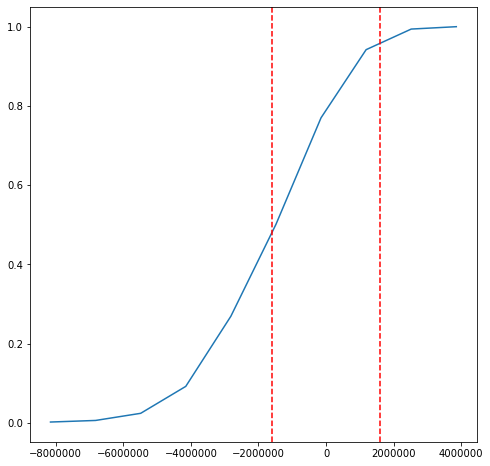

In [11]:
def mean_differencies(x1, x2, n_boot):
    ori_mean = x1.mean() - x2.mean()
    mean_diff = []
    for i in range(n_boot):
        x1_mean = x1.sample(len(x1), replace = True).mean()
        x2_mean = x2.sample(len(x2), replace = True).mean()
        mean_diff.append(x1_mean-x2_mean)

    hist,hist_edges = np.histogram(mean_diff, bins = 10, normed = True)
    dx = hist_edges[1] - hist_edges[0]
    F1 = np.cumsum(hist)*dx
    plt.figure(figsize = (8,8))
    plt.plot(hist_edges[1:], F1)
    plt.axvline(ori_mean, ls = '--', c = 'r')
    plt.axvline(ori_mean*-1, ls= '--' , c = 'r')

mean_differencies(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'],
                  youtube_delta_0[youtube_delta_0['trending_gap'].dt.days > 5]['views'],1000)

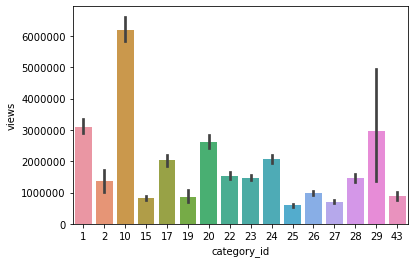

In [12]:
sns.barplot(data = youtube, x = 'category_id', y ='views')

## QUESTION

###### Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?

##### H0 = Tidak ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.
##### H1 = Ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.

#### Dari hasil test distribusi normal menggunakan:
- metode Anderson, terlihat bahwa H1 dapat diterima karena Statnya lebih dari Alpha yang telah ditentukan(dalam case ini 95%(0.05))
- metode Shapiro & K-Square, juga dapat dilihat bahwa H1 dapat diterima karena nilai p-valuenya lebih kecil dari Alpha(0.05)

In [13]:
trynormal(youtube[(youtube['category_id']==10)]['views'])

C:\Users\catin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1190.1770512259227},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [14]:
trynormal(youtube[(youtube['category_id']==29)]['views'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.03917848327174},
 'Shapiro': 3.174725022800362e-13,
 'K^2': 7.110325304841888e-09}

In [15]:
trynormal(youtube[(youtube['category_id']==10)]['likes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1059.63100476604},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [16]:
trynormal(youtube[(youtube['category_id']==29)]['likes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.770348198612865},
 'Shapiro': 2.335269564529563e-13,
 'K^2': 4.61018340359511e-08}

In [17]:
trynormal(youtube[(youtube['category_id']==10)]['dislikes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1398.5780660629043},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [18]:
trynormal(youtube[(youtube['category_id']==29)]['dislikes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.941865855475612},
 'Shapiro': 1.6795371788214802e-13,
 'K^2': 5.222212259578384e-09}

#### Dari hasil test menggunakan metode Mannwhitneyu menunjukkan hasil yang sama, yaitu p-value lebih kecil dari Alpha (0.05) yang berarti H0 ditolak (H1 diterima).

In [19]:
from scipy.stats import mannwhitneyu
result1 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['views'],
                           youtube[(youtube['category_id']==29)]['views']))
print('U-Statistic:',result1[0])
print('P-value:',result1[1])

U-Statistic: 78978.5
P-value: 4.876291818247057e-14


In [20]:
result2 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['likes'],
                           youtube[(youtube['category_id']==29)]['likes']))
print('U-Statistic:',result2[0])
print('P-value:',result2[1])

U-Statistic: 81875.0
P-value: 2.2471001015367116e-13


In [21]:
result3 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['dislikes'],
                           youtube[(youtube['category_id']==29)]['dislikes']))
print('U-Statistic:',result3[0])
print('P-value:',result3[1])

U-Statistic: 91647.5
P-value: 2.876019645817286e-11


## BARTLETT & LEVENE -- UNTUK MENENTUKAN APAKAH  VARIANCE DATA KITA EQUAL ATAU UNEQUAL

In [22]:
from scipy.stats import levene, bartlett, f_oneway, kruskal


def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat': bartlett(x1,x2)[0], 'P-Value': bartlett(x1,x2)[1]},
             'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result

try_equal_var(youtube[(youtube['category_id']==10)]['views'], youtube[(youtube['category_id']==29)]['views'])

{'Bartlett': {'Bartlett-Stat': 42.17774401543469,
  'P-Value': 8.334313062671943e-11},
 'Levene': {'Levene-Stat': 1.8972437360796675, 'P-Value': 0.16843438710372255}}

- ada perbedaan karena p-value Bartlett(data distribusi normal) < Alpha (0.05) == DATA VARIANCE UNEQUAL

In [23]:
from pingouin import welch_anova

youtube_10_20_29 = youtube[(youtube['category_id']==10) | (youtube['category_id']==20) | (youtube['category_id']==29)]

welch_anova(data = youtube_10_20_29, dv='views', between = 'category_id')

,Source,ddof1,ddof2,F,p-unc
0,category_id,2,150.976,129.873,1.548307e-33


In [24]:
from pingouin import pairwise_tukey, pairwise_gameshowell

## P-TUKEY DIGUNAKAN JIKA DATA KITA EQUAL VARIANCE

In [25]:
pairwise_tukey(data = youtube_10_20_29, dv='views', between = 'category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,10,20,6201003.12,2620830.63,3580172.489,540755.504,two-sided,6.621,0.001000,0.246
1,10,29,6201003.12,2963884.07,3237119.049,1937599.027,two-sided,1.671,0.216797,0.222
2,20,29,2620830.63,2963884.07,-343053.440,1995283.062,two-sided,-0.172,0.900000,-0.024


- 10 & 20 : ada perbedaan variance karena (p-tukey < alpha(0.05))
- 10 & 29 : tidak ada perbedaan variance karena (p-tukey > alpha(0.05))
- 20 & 29 : tidak ada perbedaan variance karena (p-tukey > alpha(0.05))

## P-GAMESHOWELL DIGUNAKAN JIKA DATA KITA UNEQUAL VARIANCE

In [26]:
pairwise_gameshowell(data = youtube_10_20_29, dv='views', between = 'category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,10,20,6201003.12,2620830.63,3580172.489,156832.668,two-sided,16.142,6125.549,0.001000,0.599
1,10,29,6201003.12,2963884.07,3237119.049,681572.891,two-sided,3.358,60.731,0.002461,0.447
2,20,29,2620830.63,2963884.07,-343053.440,672464.548,two-sided,-0.361,57.549,0.900000,-0.049


- 10 & 20 : ada perbedaan variance karena (p-val < alpha(0.05))
- 10 & 29 : ada perbedaan variance karena (p-val < alpha(0.05))
- 20 & 29 : tidak ada perbedaan variance karena (p-val > alpha(0.05))

## UJI 3 KELOMPOK ATAU LEBIH YANG BERBEDA MENGGUNAKAN KRUSKAL

In [31]:
kruskal(youtube[(youtube['category_id']==10)]['views'], youtube[(youtube['category_id']==20)]['views'], 
                youtube[(youtube['category_id']==29)]['views'])

KruskalResult(statistic=57.21993458049006, pvalue=3.757068198005064e-13)

##### pvalue < Alpha (0.05) == H1 DITERIMA / UNEQUAL MEDIAN / ADA PERBEDAAN

In [32]:
from pingouin import pairwise_ttests

## TTEST

In [34]:
pairwise_ttests(data = youtube_10_20_29, dv = 'views', between = 'category_id', parametric =  False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,category_id,10,20,False,False,2721072.5,two-sided,1.728277e-01,0.245
1,category_id,10,29,False,False,289925.5,two-sided,9.752584e-14,0.210
2,category_id,20,29,False,False,36507.5,two-sided,7.204730e-13,-0.096


- category 10 & 20 : tidak ada perbedaan median (p-unc > alpha(0.05))
- category 10 & 29 : ada perbedaan median karena (p-unc < alpha(0.05))
- category 20 & 29 : ada perbedaan median karena (p-unc < alpha(0.05))